# Creating Molecular Graphs in Graphein

Graphein provides a set of tools for working with molecular graphs. Under the hood, we wrap RDKit functions for the graph construction. While the main format used is an nx.Graph, each graph, node & edge has its underlying [RDKit object](https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html) stored as metadata so RDKit methods can still be used.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/a-r-j/graphein/blob/master/notebooks/molecule_tutorial.ipynb)

In [1]:
# Install Graphein if necessary
# !pip install graphein[extras]

In [2]:
import networkx as nx
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)

import graphein.molecule as gm

INFO:rdkit:Enabling RDKit 2022.03.1 jupyter extensions


## Config
Similar to [Protein Graph Construction](https://graphein.ai/notebooks/residue_graphs.html), configuration of small molecule graphs is controlled by a [`MoleculeGraphConfig`]() object.

In [3]:
config = gm.MoleculeGraphConfig()
config

MoleculeGraphConfig(verbose=False, add_hs=False, edge_construction_functions=[<function add_fully_connected_edges at 0x7fd2d31e5ca0>, <function add_k_nn_edges at 0x7fd2d31e5d30>, <function add_distance_threshold at 0x7fd2d31e5c10>, <function add_atom_bonds at 0x7fd2d31e5790>], node_metadata_functions=[<function atom_type_one_hot at 0x7fd270aa30d0>], edge_metadata_functions=None, graph_metadata_functions=None)

## Creating Graphs

### Creating a Molecular Graph from SMILES

Let's take a look at a simple molecule, acetylsalicylic acid (or aspirin as it's more commonly known).

CC(=O)OC1=CC=CC=C1C(=O)O


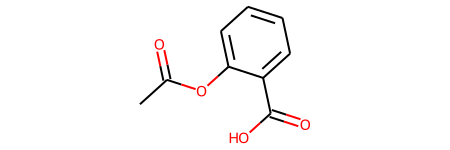

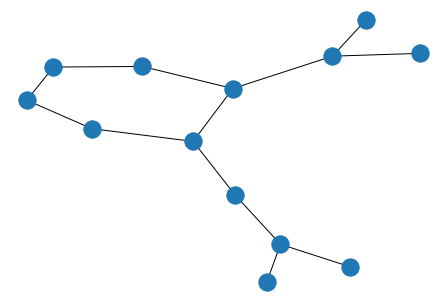

In [4]:
graph = gm.construct_graph(smiles="CC(=O)OC1=CC=CC=C1C(=O)O", config=config)
print(graph)
nx.draw(graph)
graph.graph["rdmol"]

Molecule features are stored as dictionaries on the graph, nodes and edges.

In [5]:
# Node metadata
for n, d in graph.nodes(data=True):
    print(d)

{'atomic_num': 6, 'element': 'C', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd270a5a9a0>, 'coords': None, 'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
{'atomic_num': 6, 'element': 'C', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd270ab1400>, 'coords': None, 'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
{'atomic_num': 8, 'element': 'O', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd270ab1100>, 'coords': None, 'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])}
{'atomic_num': 8, 'element': 'O', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd270ab10a0>, 'coords': None, 'atom_type_one_hot': array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])}
{'atomic_num': 6, 'element': 'C', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd270ab1160>, 'coords': None, 'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
{'atomic_num': 6, 'element': 'C', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd270ab11c0>, 'coords': N

In [6]:
# Edge metadata
for u, v, d in graph.edges(data=True):
    print(u, v, d)

C:0 C:1 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1ac0>}
C:1 O:2 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1b20>}
C:1 O:3 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1b80>}
O:3 C:4 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1be0>}
C:4 C:5 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1c40>}
C:4 C:9 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1f40>}
C:5 C:6 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1ca0>}
C:6 C:7 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1d00>}
C:7 C:8 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1d60>}
C:8 C:9 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1dc0>}
C:9 C:10 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270ab1e20>}
C:10 O:11 {'kind': {'bond'}, 'bond': <rdkit.Chem.rdch

### Creating a Molecular Graph from an SDF File

As SDFs & Mol2 files provide coordinates, we can draw the graph in 3D.

long_test


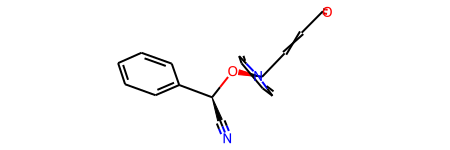

In [7]:
import pkg_resources

SDF_PATH = pkg_resources.resource_filename("graphein", "../tests/molecule/test_data/long_test.sdf")

graph = gm.construct_graph(sdf_path=SDF_PATH, config=config)

print(graph)
graph.graph["rdmol"]

In [8]:
gm.plotly_molecular_graph(graph)

### Creating a Molecular Graph from a Mol2 File

short_test


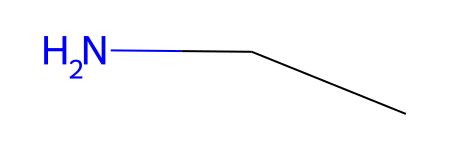

In [9]:
MOL2_PATH = pkg_resources.resource_filename("graphein", "../tests/molecule/test_data/short_test.mol2")

graph = gm.construct_graph(mol2_path=MOL2_PATH, config=config)
print(graph)
graph.graph["rdmol"]

In [10]:
gm.plotly_molecular_graph(graph)

## Adding Features
Graphein can add lots of features to graph nodes and edges from RDKit

### Node Features




In [11]:
from functools import partial

config = gm.MoleculeGraphConfig(
    node_metadata_functions=[
        gm.atom_type_one_hot,
        gm.atomic_mass,
        gm.degree,
        gm.total_degree,
        gm.total_valence,
        gm.explicit_valence,
        gm.implicit_valence,
        gm.num_explicit_h,
        gm.num_implicit_h,
        gm.total_num_h,
        gm.num_radical_electrons,
        gm.formal_charge,
        gm.hybridization,
        gm.is_aromatic,
        gm.is_isotope,
        gm.is_ring,
        gm.chiral_tag,
        partial(gm.is_ring_size, ring_size=5),
        partial(gm.is_ring_size, ring_size=7)
    ]
)
graph = gm.construct_graph(mol2_path=MOL2_PATH, config=config)

for n, d in graph.nodes(data=True):
    print(d)

INFO:graphein.molecule.edges.distance:Found: 3 KNN edges


INFO:graphein.molecule.edges.distance:Found: 9 distance edges for radius 5.0


{'atomic_num': 6, 'element': 'C', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd29027ca00>, 'coords': array([ 0.9862, -0.257 , -0.1905]), 'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'mass': 12.011, 'degree': 1, 'total_degree': 4, 'total_valence': 4, 'explicit_valence': 4, 'implicit_valence': 0, 'num_explicit_h': 3, 'num_implicit_h': 0, 'total_num_h': 3, 'num_radical_electrons': 0, 'formal_charge': 0, 'hybridization': rdkit.Chem.rdchem.HybridizationType.SP3, 'is_aromatic': False, 'is_isotope': 0, 'is_ring': False, 'chiral_tag': rdkit.Chem.rdchem.ChiralType.CHI_UNSPECIFIED, 'is_ring_5': False, 'is_ring_7': False}
{'atomic_num': 6, 'element': 'C', 'rdmol_atom': <rdkit.Chem.rdchem.Atom object at 0x7fd29027c9a0>, 'coords': array([-0.2052,  0.2236,  0.6206]), 'atom_type_one_hot': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'mass': 12.011, 'degree': 2, 'total_degree': 4, 'total_valence': 4, 'explicit_valence': 4, 'implicit_valence': 0, 'num_explicit_h': 2, 'num_implici

### Edge Features

In [12]:
config = gm.MoleculeGraphConfig(
    edge_metadata_functions=[
        gm.add_bond_type,
        gm.bond_is_aromatic,
        gm.bond_is_conjugated,
        gm.bond_is_in_ring,
        gm.bond_stereo,
        partial(gm.bond_is_in_ring_size, ring_size=5),
        partial(gm.bond_is_in_ring_size, ring_size=7)
    ]
)
graph = gm.construct_graph(mol2_path=MOL2_PATH, config=config)

for u, v, d in graph.edges(data=True):
    print(d)

INFO:graphein.molecule.edges.distance:Found: 3 KNN edges


INFO:graphein.molecule.edges.distance:Found: 9 distance edges for radius 5.0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-C:0


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:0-N:2


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge C:1-C:1


DEBUG:graphein.molecule.features.edges.bonds:No RDKit bond found on edge N:2-N:2


{'kind': {'distance_threshold', 'fully_connected'}, 'bond_type': None, 'aromatic': None, 'conjugated': None, 'ring': None, 'bond_stereo': None, 'ring_size_5': None, 'ring_size_7': None}
{'kind': {'distance_threshold', 'k_nn_1', 'fully_connected', 'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object at 0x7fd270e09e20>, 'bond_type': rdkit.Chem.rdchem.BondType.SINGLE, '_aromatic': False, 'conjugated': False, 'ring': False, 'bond_stereo': rdkit.Chem.rdchem.BondStereo.STEREONONE, 'ring_size_5': False, 'ring_size_7': False}
{'kind': {'distance_threshold', 'fully_connected'}, 'bond_type': None, 'aromatic': None, 'conjugated': None, 'ring': None, 'bond_stereo': None, 'ring_size_5': None, 'ring_size_7': None}
{'kind': {'distance_threshold', 'fully_connected'}, 'bond_type': None, 'aromatic': None, 'conjugated': None, 'ring': None, 'bond_stereo': None, 'ring_size_5': None, 'ring_size_7': None}
{'kind': {'distance_threshold', 'k_nn_1', 'fully_connected', 'bond'}, 'bond': <rdkit.Chem.rdchem.Bond object 

### Graph Features
Global descriptors of the molecule computed by RDKit can be added to the graph too!

In [13]:
config = gm.MoleculeGraphConfig(
    graph_metadata_functions=[
        gm.mol_descriptors
    ]
)
graph = gm.construct_graph(mol2_path=MOL2_PATH, config=config)

print(graph.graph)

INFO:graphein.molecule.edges.distance:Found: 3 KNN edges


INFO:graphein.molecule.edges.distance:Found: 9 distance edges for radius 5.0


{'name': 'short_test', 'rdmol': <rdkit.Chem.rdchem.Mol object at 0x7fd280c73dc0>, 'coords': array([[ 0.9862, -0.257 , -0.1905],
       [-0.2052,  0.2236,  0.6206],
       [-1.4201,  0.2357, -0.1847]]), 'smiles': 'CCN', 'config': MoleculeGraphConfig(verbose=False, add_hs=False, edge_construction_functions=[<function add_fully_connected_edges at 0x7fd2d31e5ca0>, <function add_k_nn_edges at 0x7fd2d31e5d30>, <function add_distance_threshold at 0x7fd2d31e5c10>, <function add_atom_bonds at 0x7fd2d31e5790>], node_metadata_functions=[<function atom_type_one_hot at 0x7fd270aa30d0>], edge_metadata_functions=None, graph_metadata_functions=[<function mol_descriptors at 0x7fd2d31f3280>]), 'MaxEStateIndex': 4.847222222222222, 'MinEStateIndex': 0.75, 'MaxAbsEStateIndex': 4.847222222222222, 'MinAbsEStateIndex': 0.75, 'qed': 0.40623709538988323, 'MolWt': 45.084999999999994, 'HeavyAtomMolWt': 38.028999999999996, 'ExactMolWt': 45.057849223999995, 'NumValenceElectrons': 20, 'NumRadicalElectrons': 0, 'MaxP